In [7]:
# Importing all libraries required
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Load and preprocess data
data = pd.read_csv("Dataset.csv")

In [9]:
data['Profession'] = data['Profession'].fillna('Unknown')

In [10]:
# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['Gender', 'Profession']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [11]:
# Define features and target
X = data[['Gender', 'Age', 'Annual Income', 'Work Experience', 'Family Size']]
y = data['Spending Score'] 

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

# Optimize KNN with cross-validation
k_range = range(1, 21)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The lea

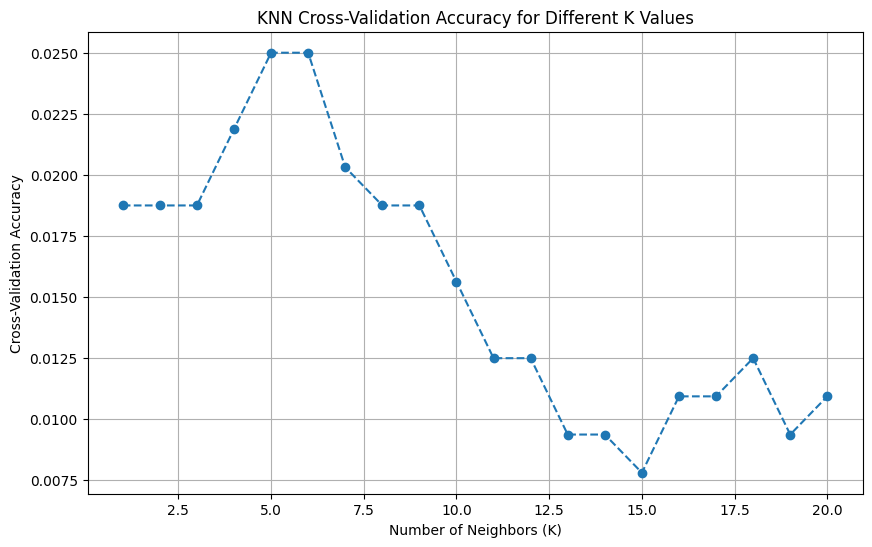

In [14]:
# Plot KNN performance
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='--')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid()
plt.show()

In [15]:
# Print optimal K value
optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal K: {optimal_k} with Cross-Validation Accuracy: {max(k_scores):.4f}")

Optimal K: 5 with Cross-Validation Accuracy: 0.0250


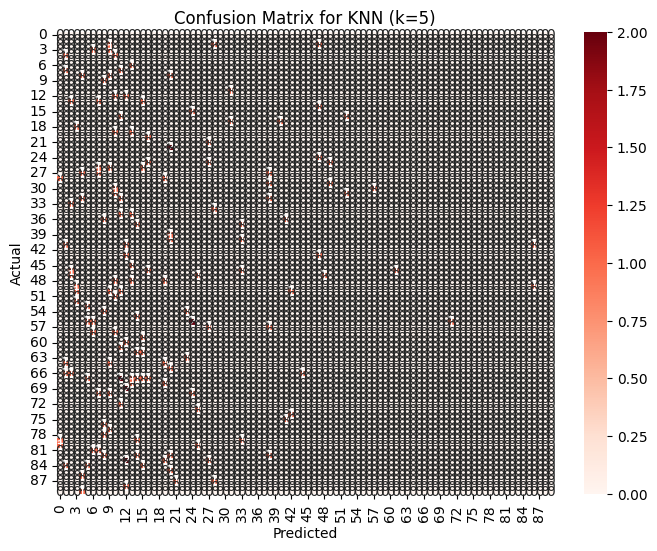

In [16]:
# Visualize confusion matrix for the best K
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title(f'Confusion Matrix for KNN (k={optimal_k})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

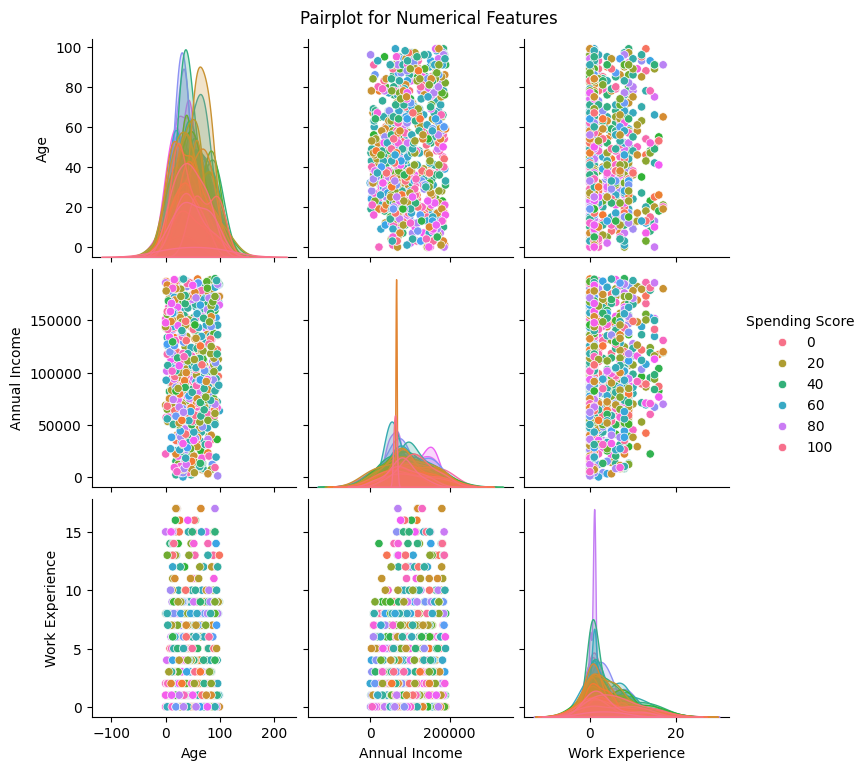

In [17]:
# Pairplot for numerical features
numerical_data = data[['Age', 'Annual Income', 'Work Experience', 'Spending Score']]
sns.pairplot(numerical_data, hue='Spending Score', palette='husl')
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_20312\253434829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


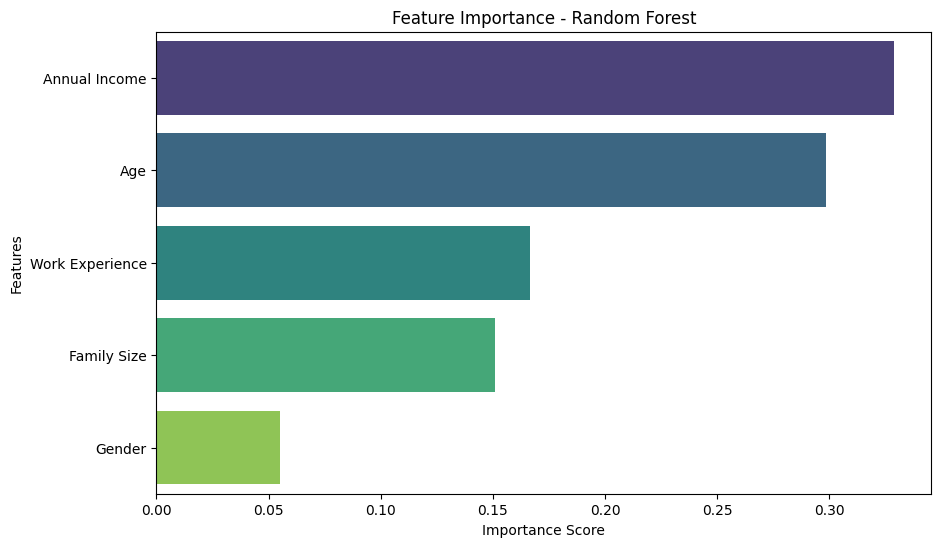

In [18]:
# Visualize feature importance using RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

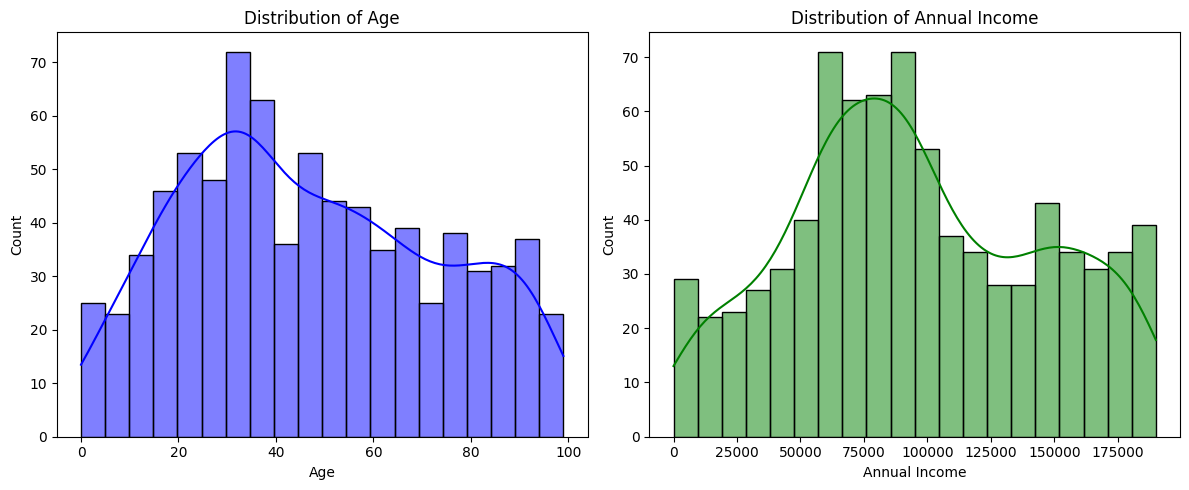

In [19]:
# Distribution plots for Age and Annual Income
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], kde=True, color='blue', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data['Annual Income'], kde=True, color='green', bins=20)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_20312\3369847158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Spending Score', y='Age', data=data, palette='Set2')
C:\Users\USER\AppData\Local\Temp\ipykernel_20312\3369847158.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Spending Score', y='Annual Income', data=data, palette='Set3')


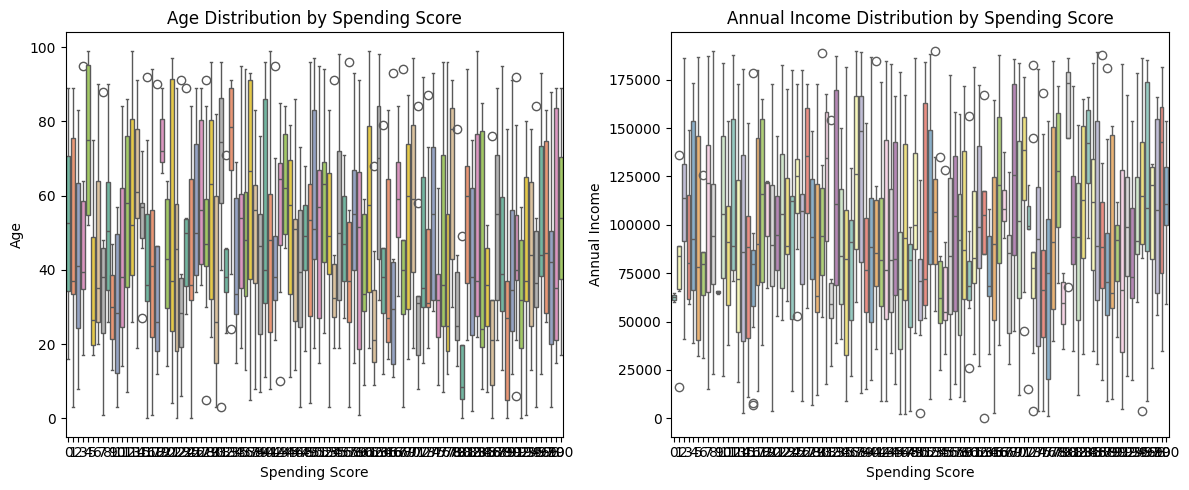

In [29]:
# Boxplots for Age and Annual Income by Spending Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Spending Score', y='Age', data=data, palette='Set2')
plt.title('Age Distribution by Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='Spending Score', y='Annual Income', data=data, palette='Set3')
plt.title('Annual Income Distribution by Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.tight_layout()
plt.show()

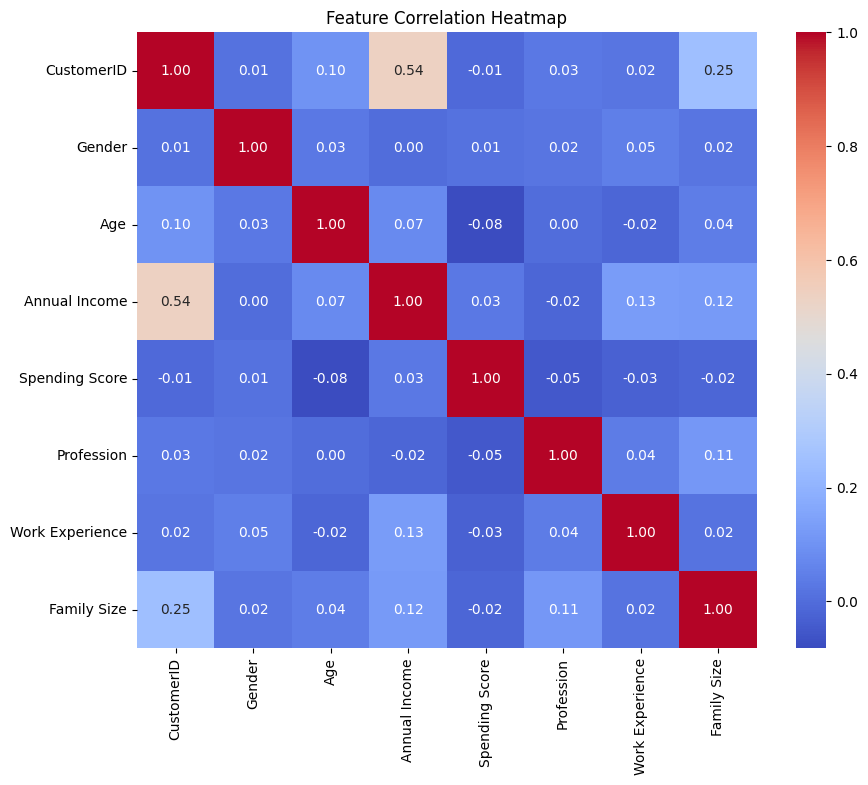

In [21]:
# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [22]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.11      0.50      0.18         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
    

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMet